In [1]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np
import env
import matplotlib.pyplot as plt
import os
import prepare
import wrangle
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = wrangle.get_zillow_sfr_data()

In [3]:
train, validate, test = wrangle.clean_prep_zillow(df)

/Users/fullspectrum/codeup-data-science/logistic_regression/wrangle.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)
/Users/fullspectrum/codeup-data-science/logistic_regression/wrangle.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([df.columns[0]], axis = 1, inplace = True)
/Users/fullspectrum/codeup-data-science/logistic_regression/wrangle.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [4]:
sfr_train = train

In [5]:
sfr_train.head().T

,1766466,1073889,1223806,1694410,1436362
bedroom,3.00,3.00,5.00,2.00,2.00
bathroom,2.00,2.00,5.00,1.00,2.00
sqrft,1642.00,1858.00,4433.00,888.00,1966.00
tax_value,231120.00,178499.00,913447.00,54621.00,760368.00
year_built,1960.00,1955.00,2001.00,1953.00,1925.00
taxamount,2898.13,2204.12,10717.51,606.26,8290.04
fips,6037.00,6059.00,6037.00,6037.00,6037.00


In [6]:
x_train = train.drop(columns = ['tax_value'])
y_train = train['tax_value']
x_val = validate.drop(columns = ['tax_value'])
y_val = validate['tax_value']
x_test = test.drop(columns = ['tax_value'])
y_test = test['tax_value']

Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [7]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(x_train)

MinMaxScaler()

In [8]:
mm_x_train = mm_scaler.transform(x_train.sample(1000))
mm_x_train[:5]

array([[1.20000000e-01, 9.37500000e-02, 1.42665932e-03, 8.00000000e-01,
        5.59225953e-03, 0.00000000e+00],
       [8.00000000e-02, 3.12500000e-02, 1.08862819e-03, 5.20930233e-01,
        1.52591116e-02, 0.00000000e+00],
       [8.00000000e-02, 3.12500000e-02, 7.54796210e-04, 6.97674419e-01,
        3.45128970e-03, 1.00000000e+00],
       [1.60000000e-01, 6.25000000e-02, 1.76049130e-03, 7.76744186e-01,
        5.09631090e-03, 0.00000000e+00],
       [2.80000000e-01, 1.56250000e-01, 3.28897987e-03, 9.02325581e-01,
        9.77664753e-03, 2.97297297e-01]])

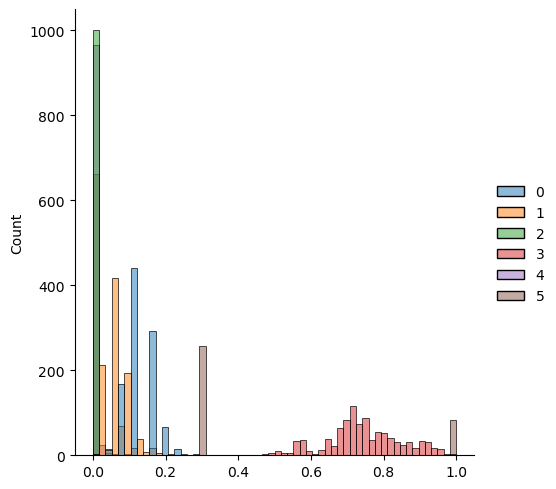

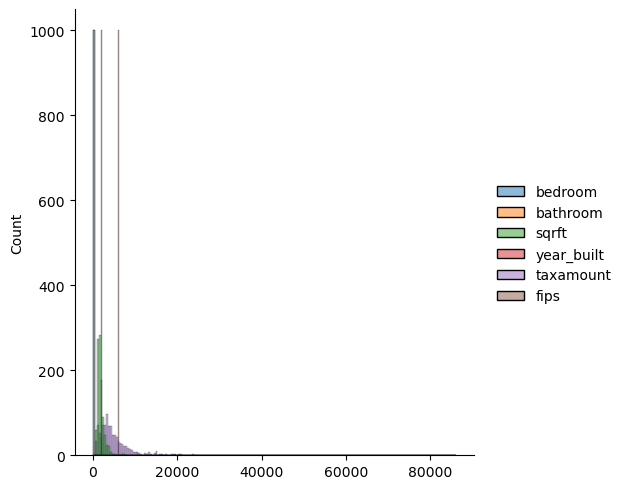

In [9]:
sns.displot(mm_x_train)
plt.show()
sns.displot(x_train.sample(1000))
plt.show()

In [10]:
sd_scaler = StandardScaler()


In [11]:
sd_scaler.fit(x_train)

StandardScaler()

In [12]:
ss_x_train = sd_scaler.transform(x_train.sample(1000))

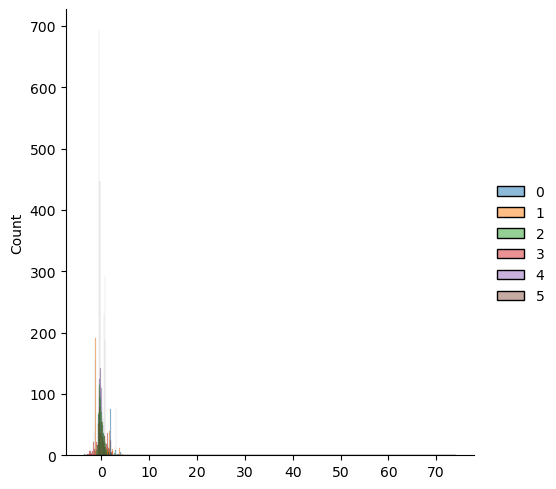

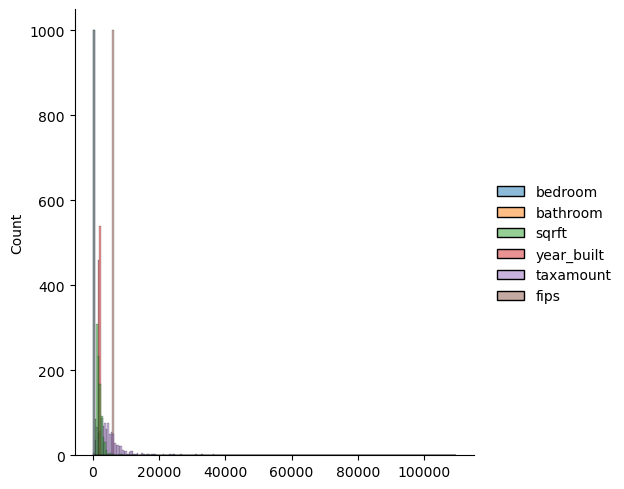

In [13]:
sns.displot(ss_x_train)
plt.show()
sns.displot(x_train.sample(1000))
plt.show()

In [14]:
rb_scaler = RobustScaler()
rb_scaler.fit(x_train)

RobustScaler()

In [15]:
rb_x_train = rb_scaler.transform(x_train.sample(1000))

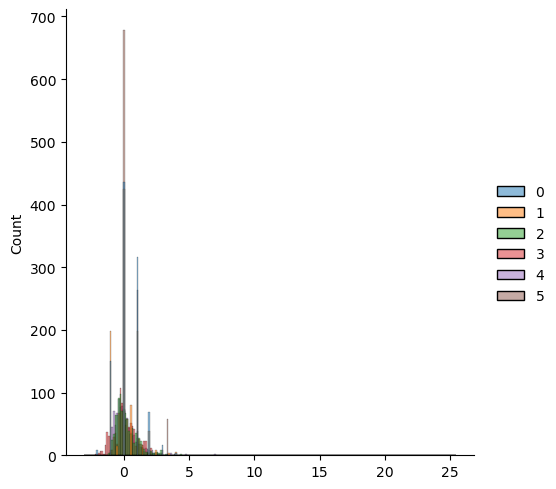

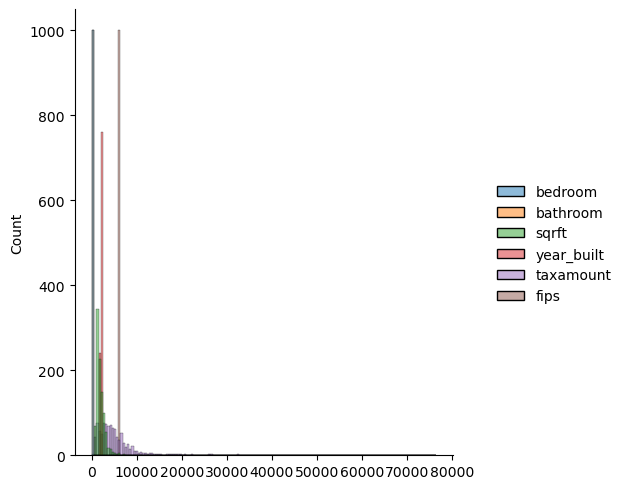

In [16]:
sns.displot(rb_x_train)
plt.show()
sns.displot(x_train.sample(1000))
plt.show()

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [17]:
inverted = rb_scaler.inverse_transform(x_train.sample(1000))

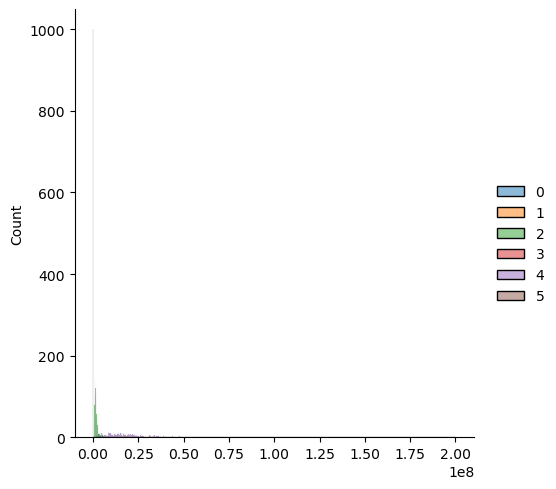

In [18]:
sns.displot(inverted)
plt.show()

Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!